In [1]:
##Estimación de datos de finanzas públicas
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign,httr,jsonlite)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang  (1.1.4 -> 1.1.6) [CRAN]
glue   (1.7.0 -> 1.8.0) [CRAN]
cli    (3.6.3 -> 3.6.5) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 4 packages: rlang, glue, cli, tibble

Warning message:
"package 'tibble' is in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpuIJeVC\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpuIJeVC\remotes57ec63386ea9\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [2]:
mujeres_seg<-openxlsx::read.xlsx("datos_espacio_publico_20250602.xlsx", sheet="Mujeres_seguras_caminar")%>%
  
rename(
  year = periodo,
  estimado = tendencia_deseable,
  superior = tendencia_inercial,
  inferior=tendencia_disruptivo

)
mujeres_seg

,year,superior,estimado,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2021,21.13415,21.13415,21.13415
2,2022,23.46046,23.46046,23.46046
3,2023,24.79811,24.79811,24.79811
4,2024,31.17885,31.17885,31.17885
5,2025,30.73777,32.28153,32.64910
6,2026,30.30294,33.42322,34.18868
7,2027,29.87425,34.60528,35.80085
8,2028,29.45164,35.82915,37.48905
9,2029,29.03499,37.09630,39.25686


In [3]:
camina<-openxlsx::read.xlsx("datos_espacio_publico_20250602.xlsx",sheet="segur_parque_centrorecre")%>%
  
rename(
  year = periodo,
  estimado = tendencia_deseable,
  superior = tendencia_inercial,
  inferior=tendencia_disruptivo

)
camina

,year,superior,estimado,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2020,36.03626,36.03626,36.03626
2,2021,35.64572,35.64572,35.64572
3,2022,40.53276,40.53276,40.53276
4,2023,46.84394,46.84394,46.84394
5,2024,43.51678,43.51678,43.51678
6,2025,42.75182,44.28173,44.66421
7,2026,42.00030,45.06014,45.84191
8,2027,41.26200,45.85223,47.05066
9,2028,40.53668,46.65824,48.29128


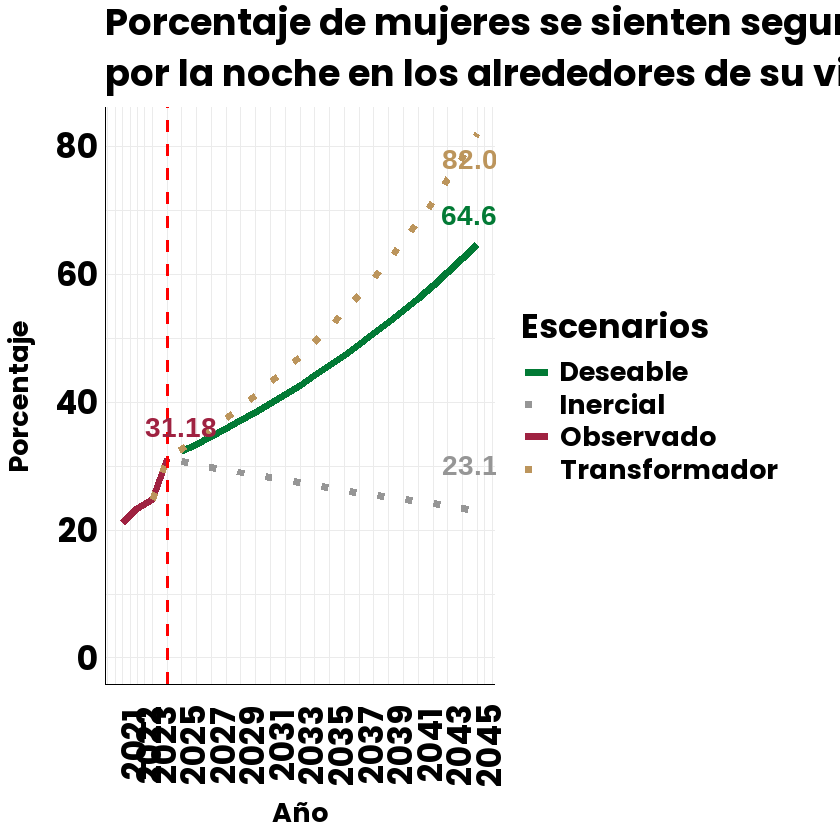

In [12]:
grafica_bonita(
  data = mujeres_seg,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de mujeres se sienten seguras al caminar solas
por la noche en los alrededores de su vivienda",
    ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  desplazamiento_ano_base=c(0.9, 5),
  anios_etiquetas = c(2045),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/mujeres_seg_estimada.png",
 width = 10, height = 6, dpi = 185, bg = "white")

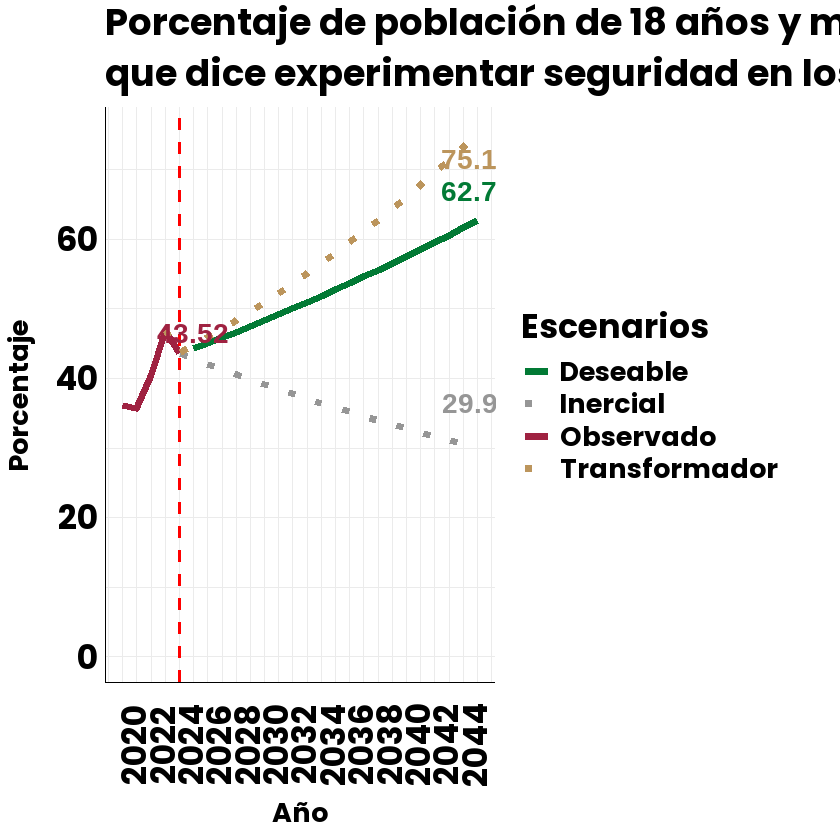

In [13]:
grafica_bonita(
  data = camina,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población de 18 años y más 
que dice experimentar seguridad en los parques o centros recreativos",
  
    ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(0.9, 3),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/pob_seg_parques_estimada.png", 
width = 10, height = 6, dpi = 185, bg = "white")